# Rasrigin関数(非凸関数)の最小化

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### 準備 (グローバル定数の設定)

In [2]:
n = 50
num_itr = 150
K = 50
adam_lr = 5e-6
max_inner = 100

A = 10

10

### Rasrigin関数

In [3]:
function f(x)
    return A*n + sum(x.^2 - A*cos.(2pi*x))
end

f (generic function with 1 method)

### Rasrigin関数の勾配ベクトル

In [4]:
function df(x)
    return 2x + 2pi*A*sin.(2pi*x)
end

df (generic function with 1 method)

### ミニバッチ生成関数

In [5]:
function mini_batch(K)
    xini = 5.0*randn(n,K)
    return xini
end

mini_batch (generic function with 1 method)

### 固定ステップサイズのGD法のMSE

In [6]:
function GD(max_itr, xini, η)
    x = xini
    for i in 1:max_itr
        x = x - η*df(x)
    end
    return x
end

function comp_mse(max_itr, η)
    xini = mini_batch(K)
    x̂ = GD(max_itr, xini, η)
    return norm(x̂)^2/K
end

comp_mse (generic function with 1 method)

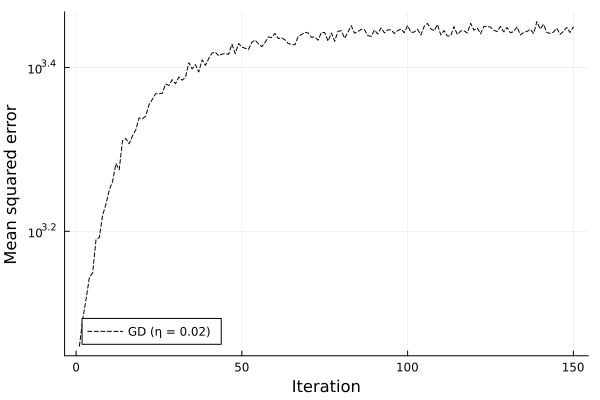

In [7]:
GD_mse = [comp_mse(i, 0.02) for i in 1:num_itr]
plot(1:num_itr, GD_mse, legend=:bottomleft, lw=1, ls=:dash, yscale=:log10, label="GD (η = 0.02)", color=:black,  xlabel="Iteration", ylabel="Mean squared error")

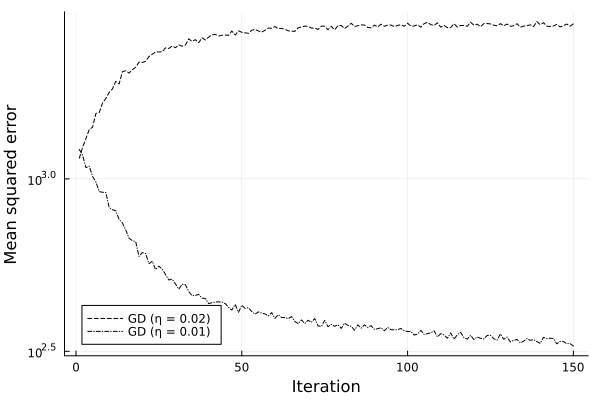

In [8]:
GD_mse = [comp_mse(i, 0.01) for i in 1:num_itr]
plot!(1:num_itr, GD_mse, lw=1, ls=:dashdot, yscale=:log10, label="GD (η = 0.01)", color=:black,  xlabel="Iteration", ylabel="Mean squared error")

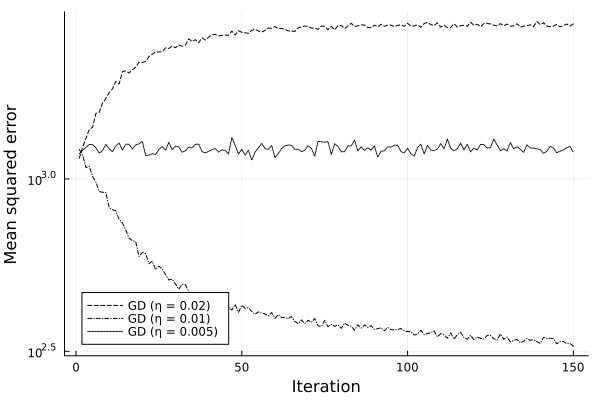

In [9]:
GD_mse = [comp_mse(i, 0.005) for i in 1:num_itr]
plot!(1:num_itr, GD_mse, lw=1, ls=:dot, yscale=:log10, label="GD (η = 0.005)", color=:black,  xlabel="Iteration", ylabel="Mean squared error")

### DU-GD反復の定義 

In [10]:
function DU_GD(max_itr, xini, η)
    x = xini
    for i in 1:max_itr
        x = x - η[i]*df(x)
    end
    return x
end

DU_GD (generic function with 1 method)

### 損失関数の定義

In [11]:
function loss(x̂)
    return norm(x̂)^2/K
end     

loss (generic function with 1 method)

### 訓練関数の定義

In [12]:
function train(opt, η)
    ps = Flux.params(η) 
    for itr in 1:num_itr 
        for i in 1:max_inner 
            x_ini = mini_batch(K)
            gs = Flux.gradient(ps) do 
                loss(DU_GD(itr, x_ini, η))
            end
            Flux.Optimise.update!(opt, ps, gs) 
        end
        x_ini = mini_batch(K)
        x̂ = DU_GD(itr, x_ini, η)
        println(itr, " ", loss(x̂))
    end
end

train (generic function with 1 method)

### DU-GDのMSE評価用関数

In [13]:
function comp_mse_DUGD(max_itr, η)
    x_ini = mini_batch(K)
    x̂ = DU_GD(max_itr, x_ini, η)
    return loss(x̂)
end

comp_mse_DUGD (generic function with 1 method)

### 学習過程

1 1232.5162517585582
2 1060.8431016371803
3 1004.2445224834576
4 893.2116377426828
5 819.0185335101582
6 686.2438183574926
7 588.6234256977472
8 513.7072516665035
9 448.5959379517675
10 380.05694231341266
11 334.68603049901924
12 323.5412281870797
13 297.7033321122448
14 272.20060527946123
15 237.33633752867325
16 214.58474663368386
17 211.0137239878395
18 196.1430113501491
19 172.50783181933838
20 179.97427182999377
21 159.2599336749661
22 159.9495426525347
23 142.5289767397582
24 136.43854746483905
25 116.3057440779308
26 133.44847514121446
27 118.47443911615703
28 105.90709745119659
29 103.50900768384004
30 96.0662865670341
31 74.87054748477948
32 95.35683355850344
33 94.16716544252806
34 88.1283213782182
35 71.28471126742078
36 72.93333820806542
37 67.25196108259189
38 65.98501577269434
39 64.76729530024825
40 63.28230300766122
41 66.96153278896371
42 66.94952568705297
43 62.8115891907903
44 54.64575505193059
45 53.50436601226013
46 37.55788130552798
47 47.431398818569185
48 38.903

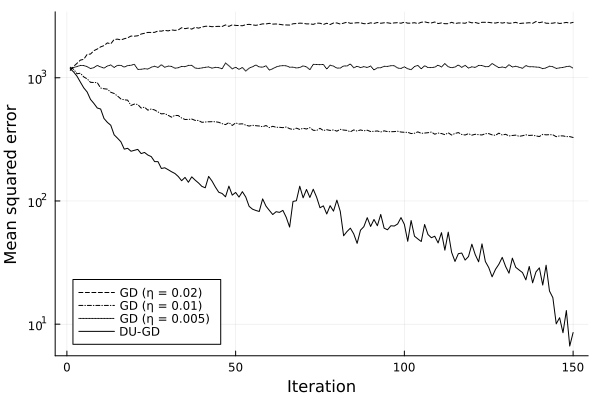

In [14]:
η_train = 0.01ones(num_itr)
opt = Flux.ADAM(adam_lr)
train(opt, η_train)
DUGD_mse =[comp_mse_DUGD(i, η_train) for i in 1:num_itr]
plot!(1:num_itr, DUGD_mse, lw=1, label="DU-GD", color=:black)

In [15]:
savefig("Rastrigin.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_3/Rastrigin.pdf"

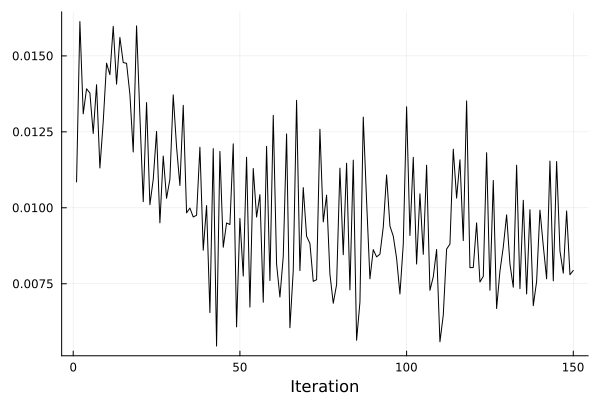

In [16]:
plot(1:num_itr, η_train, color=:black, legend=false, xlabel="Iteration")

In [17]:
savefig("Rastrigin-param.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_3/Rastrigin-param.pdf"